**Librerias**

In [ ]:
Iniciamos la instalacion de la libreria de Pymongo que no se encunetra instalada previamente en Python para poder trabajar los datos en formato JSON

In [ ]:
!pip install pymongo

**Importacion de librerias**
Para la ejecución y análisis de esta tarea, se han utilizado las siguientes librerías en Python:

In [ ]:
import pandas as pd
import sys
import os
from pymongo import MongoClient, UpdateOne
import json
from math import isnan
from collections import defaultdict, Counter
from math import isnan
import numpy as np
import estadistica as est
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Estas herramientas permiten el tratamiento, análisis y visualización de los datos.
En particular, la librería estadistica ha sido desarrollada de forma personalizada para incluir funciones como:

- Detección de outliers mediante el rango intercuartílico (RIC)

- Imputación de valores faltantes usando media, mediana o moda

Además, se ha utilizado PyMongo para conectarse a la base de datos MongoDB y realizar operaciones como inserciones, actualizaciones, filtrado y agregación.

Para la perfecta ejecucion de los archivos

In [ ]:
#Con este codigo nos aseguramos de que todos los archivos esten en una misma carpeta.
print(os.listdir())

['.ipynb_checkpoints', 'CODIGOS_TAREA_FINAL_MONGODB.ipynb', 'estadistica.py', 'gym_members_exercise_tracking_synthetic_data.json', 'TAREA_FINAL_MONGODB.ipynb', '__pycache__']


***1. Carga de los datos***
Convertimos el CSV a JSON
Para este proyecto, el dataset original fue descargado en formato .csv. Utilicé pandas en Python para convertirlo a formato .json, que es el requerido por MongoDB. El archivo resultante (gym_members_exercise_tracking_synthetic_data.json) se incluye en la entrega para que pueda ser cargado directamente en la base de datos.
El código utilizado para la conversión es el siguiente:

df = pd.read_csv("gym_members_exercise_tracking_synthetic_data.csv")
datos_json = df.to_dict(orient="records")

with open("gym_members_exercise_tracking_synthetic_data.json", "w", encoding="utf-8") as archivo:
    json.dump(datos_json, archivo, ensure_ascii=False, indent=4)

In [ ]:
# Ruta corregida con .csv
ruta_csv = r"C:\Users\genes\OneDrive\Escritorio\MONGODB\gym_members_exercise_tracking_synthetic_data.csv"

df = pd.read_csv(ruta_csv)

# Convertir a lista de diccionarios
datos_json = df.to_dict(orient="records")

# Guardar como archivo JSON
with open("gym_members_exercise_tracking_synthetic_data.json", "w", encoding="utf-8") as archivo:
    json.dump(datos_json, archivo, ensure_ascii=False, indent=4)

***Borramos todo el contenido que este adentro de archivo para ingresar nuevo pasamos a conectar nuestro Jupyter a nuestro servidor de MongoDB, aqui
"Estámos haciendo un flujo típico de inserción de datos en MongoDB desde Python"***

In [ ]:
client = MongoClient("mongodb://localhost:27017")

db = client["gym_data"]
coleccion = db["gym_members_exercise_tracking_synthetic_data"]

# 3. Leer el archivo JSON desde Jupyter
with open("gym_members_exercise_tracking_synthetic_data.json", "r") as archivo:
    registros = json.load(archivo)

# 4. Eliminar los registros actuales
coleccion.delete_many({})

DeleteResult({'n': 1800, 'ok': 1.0}, acknowledged=True)

***Leer el archivo JSON y cargar los datos***

In [ ]:
# Leer el archivo JSON
with open("gym_members_exercise_tracking_synthetic_data.json", "r") as archivo:
    datos = json.load(archivo)

# Insertar todos los documentos
coleccion.insert_many(datos)

InsertManyResult([ObjectId('68348912c68ed2da9d59016d'), ObjectId('68348912c68ed2da9d59016e'), ObjectId('68348912c68ed2da9d59016f'), ObjectId('68348912c68ed2da9d590170'), ObjectId('68348912c68ed2da9d590171'), ObjectId('68348912c68ed2da9d590172'), ObjectId('68348912c68ed2da9d590173'), ObjectId('68348912c68ed2da9d590174'), ObjectId('68348912c68ed2da9d590175'), ObjectId('68348912c68ed2da9d590176'), ObjectId('68348912c68ed2da9d590177'), ObjectId('68348912c68ed2da9d590178'), ObjectId('68348912c68ed2da9d590179'), ObjectId('68348912c68ed2da9d59017a'), ObjectId('68348912c68ed2da9d59017b'), ObjectId('68348912c68ed2da9d59017c'), ObjectId('68348912c68ed2da9d59017d'), ObjectId('68348912c68ed2da9d59017e'), ObjectId('68348912c68ed2da9d59017f'), ObjectId('68348912c68ed2da9d590180'), ObjectId('68348912c68ed2da9d590181'), ObjectId('68348912c68ed2da9d590182'), ObjectId('68348912c68ed2da9d590183'), ObjectId('68348912c68ed2da9d590184'), ObjectId('68348912c68ed2da9d590185'), ObjectId('68348912c68ed2da9d5901

***Verificar que los datos se insertaron correctamente***

In [ ]:
print(f"Documentos insertados: {coleccion.count_documents({})}")

Documentos insertados: 1800


***Verificar los datos insertados, Veamos los primeros documentos en la colección para asegurarnos de que todo está bien***

In [ ]:
# Mostrar los primeros 3 documentos insertados #En forma de lista diccionario para que se pueda visualizar en que formato estan hecho los documentos.
for doc in coleccion.find().limit(5):
    print(doc)

{'_id': ObjectId('68348912c68ed2da9d59016d'), 'Age': 34.0, 'Gender': 'Female', 'Weight (kg)': 86.7, 'Height (m)': 1.86, 'Max_BPM': '174', 'Avg_BPM': 152.0, 'Resting_BPM': 74.0, 'Session_Duration (hours)': 1.12, 'Calories_Burned': 712.0, 'Workout_Type': 'Strength', 'Fat_Percentage': 12.8, 'Water_Intake (liters)': 2.4, 'Workout_Frequency (days/week)': 5.0, 'Experience_Level': 2.0, 'BMI': 14.31}
{'_id': ObjectId('68348912c68ed2da9d59016e'), 'Age': 26.0, 'Gender': 'Female', 'Weight (kg)': 84.7, 'Height (m)': 1.83, 'Max_BPM': '166', 'Avg_BPM': 156.0, 'Resting_BPM': 73.0, 'Session_Duration (hours)': 1.0, 'Calories_Burned': 833.0, 'Workout_Type': 'Strength', 'Fat_Percentage': 27.9, 'Water_Intake (liters)': 2.8, 'Workout_Frequency (days/week)': 5.0, 'Experience_Level': 2.0, 'BMI': 33.49}
{'_id': ObjectId('68348912c68ed2da9d59016f'), 'Age': 22.0, 'Gender': 'Male', 'Weight (kg)': 64.8, 'Height (m)': 1.85, 'Max_BPM': '187', 'Avg_BPM': 166.0, 'Resting_BPM': 64.0, 'Session_Duration (hours)': 1.24, 

***Comprobamos la data que tenemos***

In [ ]:
#Visualizamos nuestros datos en pd para una mejor visualizacion y ocultamos la columna id que no aporta nada de valor
#Ocultamos el ID ya que no nos aporta informacion

pd.set_option("display.max_columns",None)

query = coleccion.find({}, {"_id": 0}).limit(5)
pd.DataFrame(list(query))

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83


***Procedemos a borrar variables (columnas) que no vamos a utilizar para nuestro analisis***
Borrar estos campos no nos perjudica en nada ya que son variables con las que no vamos a trabajar.

In [ ]:
coleccion.update_many({}, {"$unset": {"Resting_BPM": "","Weight (kg)": "",
    "Height (m)": "","Water_Intake (liters)": "","Fat_Percentage": "","Max_BPM": "","BMI": "",}})

UpdateResult({'n': 1800, 'nModified': 1800, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

***Verificamos nuevamente los datos que tenemos en nuestro Dataframe***

In [ ]:
pd.set_option("display.max_columns",None)

query = coleccion.find({}, {"_id": 0}).limit(10)
pd.DataFrame(list(query))

,Age,Gender,Avg_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Workout_Frequency (days/week),Experience_Level
0,34.0,Female,152.0,1.12,712.0,Strength,5.0,2.0
1,26.0,Female,156.0,1.00,833.0,Strength,5.0,2.0
2,22.0,Male,166.0,1.24,1678.0,Cardio,3.0,2.0
3,54.0,Female,169.0,1.45,628.0,Cardio,4.0,1.0
4,34.0,Female,169.0,1.60,1286.0,Strength,4.0,2.0
5,38.0,Female,128.0,1.62,953.0,HIIT,2.0,2.0
6,44.0,Female,142.0,1.46,1238.0,Cardio,2.0,2.0
7,50.0,Female,136.0,1.63,829.0,Strength,4.0,2.0
8,18.0,Female,169.0,0.77,802.0,HIIT,3.0,1.0
9,34.0,Female,169.0,2.00,1231.0,Yoga,5.0,2.0


***2. Detección de datos faltantes y limpieza de data***
*Pasamos a revisar que tipo de datos tienen nuestras variables categoricas*
Gender y Workout_Type
Ahora pasamos a limpiar nuestra data
Ver cuantos datos NaN hay en la data para proceder a limpiarla

In [ ]:
valores_gender = coleccion.distinct("Gender")

for valor in valores_gender:
    print(f"'{valor}'")

'nan'
'Female'
'Male'


In [ ]:
valores_workout = coleccion.distinct("Workout_Type")

for valor in valores_workout:
    print(f"'{valor}'")

'nan'
'Cardio'
'HIIT'
'Strength'
'Yoga'
'\nStrength'
'\tCardio'
'\tYoga'


🧠 ¿Qué significa esto?
Tus datos contienen caracteres literales como:

"\nStrength" → Esto es el texto \nStrength, no un salto real de línea.

"\tCardio" → Esto es el texto \tCardio, no una tabulación real.

Estos probablemente vienen del archivo CSV original o de un error en la conversión a JSON, donde se guardaron los símbolos de escape como texto plano.

In [ ]:
docs = coleccion.find({"Workout_Type": {"$exists": True}})
actualizaciones = []

for doc in docs:
    original = str(doc["Workout_Type"])

    # Aquí reemplazamos texto literal "\n" y "\t"
    limpio = original.replace("\\n", "").replace("\\t", "").strip()

    if original != limpio:
        actualizaciones.append(UpdateOne({"_id": doc["_id"]},{"$set": {"Workout_Type": limpio}}))

if actualizaciones:
    resultado = coleccion.bulk_write(actualizaciones)
    print(f"Documentos modificados: {resultado.modified_count}")
else:
    print("No hay datos por limpiar.")

Documentos modificados: 33


***Datos limpiados correctamente***

In [ ]:
for doc in coleccion.aggregate([
    {"$group": {"_id": "$Workout_Type", "total": {"$sum": 1}}},{"$sort": {"total": -1}}
]):
    print(f"{doc['_id']}: {doc['total']}")

Strength: 476
Cardio: 439
Yoga: 435
HIIT: 389
nan: 61


***Evaluamos cuando NaN tienen las variables que queremos trabajar***)

In [ ]:
nan_por_campo = defaultdict(int)

# Recorre todos los documentos de la colección
for doc in coleccion.find():
    for campo, valor in doc.items():
        if isinstance(valor, float) and isnan(valor):
            nan_por_campo[campo] += 1

# Imprimir resultados
for campo, cantidad in nan_por_campo.items():
    print(f"Campo '{campo}': {cantidad} valores NaN")

Campo 'Workout_Type': 61 valores NaN
Campo 'Age': 10 valores NaN
Campo 'Workout_Frequency (days/week)': 58 valores NaN
Campo 'Session_Duration (hours)': 23 valores NaN
Campo 'Experience_Level': 57 valores NaN
Campo 'Gender': 71 valores NaN
Campo 'Avg_BPM': 30 valores NaN
Campo 'Calories_Burned': 23 valores NaN


***Ver cuantos datos nulos hay en la data para proceder a limpiarla***

In [ ]:
null_por_variable = defaultdict(int)

# Recorremos todos los documentos
for doc in coleccion.find():
    for campo, valor in doc.items():
        if valor is None:  # Detecta explícitamente los null (None en PyMongo)
            null_por_variable[campo] += 1

# Mostrar resultados
if null_por_variable:
    for campo, cantidad in null_por_variable.items():
        print(f"Campo '{campo}': {cantidad} valores NULL")
else:
    print("No hay valores NULL en la colección.")

No hay valores NULL en la colección.


***4. Unificación del tratamiento de valores faltantes***
Como MongoDB no permite comparar directamente con NaN, se reemplazaron todos los valores NaN por null (None en Python) para facilitar la imputación posterior

In [ ]:
total_actualizados = 0

for doc in coleccion.find():
    actualizaciones = {}

    for campo, valor in doc.items():
        if isinstance(valor, float) and isnan(valor):
            actualizaciones[campo] = None  # Reemplazar NaN por null

    # Si hay algún campo con NaN en este documento
    if actualizaciones:
        coleccion.update_one({"_id": doc["_id"]},{"$set": actualizaciones})
        total_actualizados += 1

print(f"Se actualizaron {total_actualizados} documentos con valores NaN reemplazados por null.")

Se actualizaron 305 documentos con valores NaN reemplazados por null.


***5. Segunda verificación de nulos***
Se realizó una segunda verificación para asegurarse de que todos esos NaN pasaron a null.

In [ ]:
null_por_variable = defaultdict(int)

# Recorremos todos los documentos
for doc in coleccion.find():
    for campo, valor in doc.items():
        if valor is None:  # Detecta explícitamente los null (None en PyMongo)
            null_por_variable[campo] += 1

# Mostrar resultados
if null_por_variable:
    for campo, cantidad in null_por_variable.items():
        print(f"Campo '{campo}': {cantidad} valores NULL")
else:
    print("No quedan valores NULL en la colección.")

Campo 'Workout_Type': 61 valores NULL
Campo 'Age': 10 valores NULL
Campo 'Workout_Frequency (days/week)': 58 valores NULL
Campo 'Session_Duration (hours)': 23 valores NULL
Campo 'Experience_Level': 57 valores NULL
Campo 'Gender': 71 valores NULL
Campo 'Avg_BPM': 30 valores NULL
Campo 'Calories_Burned': 23 valores NULL


***6. Detección de outliers**
Se utilizaron los valores intercuartílicos (IQR) para detectar posibles outliers en variables numéricas antes de imputar

In [ ]:
#En este bloque de codigo, usamos funciones ya guardadas en nuestra libreria de estadistica
est.detectar_outliers_ric(coleccion, "Age")
est.detectar_outliers_ric(coleccion, "Workout_Frequency (days/week)")
est.detectar_outliers_ric(coleccion, "Session_Duration (hours)")
est.detectar_outliers_ric(coleccion, "Experience_Level")
est.detectar_outliers_ric(coleccion, "Avg_BPM")
est.detectar_outliers_ric(coleccion, "Calories_Burned")

'Age': No se encontraron Outliers.
'Workout_Frequency (days/week)': No se encontraron Outliers.
'Session_Duration (hours)': No se encontraron Outliers.
'Experience_Level': No se encontraron Outliers.
'Avg_BPM': No se encontraron Outliers.
'Calories_Burned': No se encontraron Outliers.


***SABIENDO QUE EN NUESTRA DATA NO TENEMOS OUTLIERS, PROCEDEMOS A IMPUTAR NUESTROS DATOS NULOS A LA MEDIA, MEDIANA Y MODO***
En este caso pasamos a la media las variables Age, Session_Duration (hours), Avg_BPM, Calories_Burned por que ....


In [ ]:
#Ahora pasamos a imputar estas variables a la media ya que son categorias numericas y no presentan Outliers
est.imputar_null_media_mediana(coleccion, "Age", metodo="media")
est.imputar_null_media_mediana(coleccion, "Session_Duration (hours)", metodo="media")
est.imputar_null_media_mediana(coleccion, "Avg_BPM", metodo="media")
est.imputar_null_media_mediana(coleccion, "Calories_Burned", metodo="media")

'Age' imputado con la media: 34.48 → 10 documents actualizados.
'Session_Duration (hours)' imputado con la media: 1.39 → 23 documents actualizados.
'Avg_BPM' imputado con la media: 146.26 → 30 documents actualizados.
'Calories_Burned' imputado con la media: 1033.70 → 23 documents actualizados.


***AHORA PASAMOS A IMPUTAR LOS DATOS DE LAS VARIABLES Experience_Level Y Workout_Frequency CON LA MEDIANA QUE TIENEN VALORES ORDINALES Y NO SE PUEDEN IMPUTAR CON LA MEDIA***

In [ ]:
est.imputar_null_media_mediana(coleccion, "Experience_Level", metodo="mediana")
est.imputar_null_media_mediana(coleccion, "Workout_Frequency (days/week)", metodo="mediana")

'Experience_Level' imputado con la mediana: 2.00 → 57 documents actualizados.
'Workout_Frequency (days/week)' imputado con la mediana: 3.00 → 58 documents actualizados.


In [ ]:
***Pasamos a imputar las variables wokout_Type y Gender a la moda ya que son variables categoricas***

In [ ]:
#Pasamos a imputar las variables wokout_Type y Gender a la moda ya que son variables categoricas
est.imputar_null_por_moda(coleccion, "Workout_Type")
est.imputar_null_por_moda(coleccion, "Gender")

Imputado 'Workout_Type' con la moda: 'Strength'
Documentos modificados: 61
Imputado 'Gender' con la moda: 'Female'
Documentos modificados: 71


***Comprobamos nuevamente si hay nulos para proseguir con nuestras consultas***

In [ ]:
null_por_variable = defaultdict(int)

# Recorremos todos los documentos
for doc in coleccion.find():
    for campo, valor in doc.items():
        if valor is None:  # Detecta explícitamente los null (None en PyMongo)
            null_por_variable[campo] += 1

if null_por_variable:
    for campo, cantidad in null_por_variable.items():
        print(f"Campo '{campo}': {cantidad} valores NULL")
else:
    print("No quedan valores NULL en la colección.")

No quedan valores NULL en la colección.


***Empezamos con nuestras consultas***

1. ¿Cuántos hombres y mujeres hacen ejercicio?

In [ ]:
#Analizamos cuantos hombres y mujeres hacen ejercicio
query_comparacion= [{"$match": {"Gender": {"$in": ["Male", "Female"]}}},
    {"$group": {"_id": "$Gender","cantidad": {"$sum": 1}}},{"$sort": {"cantidad": -1}}]

resultado = list(coleccion.aggregate(query_comparacion))
for r in resultado:
    print(f"{r['_id']}: {r['cantidad']}")

Female: 943
Male: 857


2. Quién hace más horas por sesión?
Comparando el promedio de duración de sesión entre "Male" y "Female".

In [ ]:
query_duracion = [{"$group": {"_id": "$Gender","duracion_promedio": {"$avg": "$Session_Duration (hours)"}}},]

resultado = list(coleccion.aggregate(query_duracion))
for r in resultado:
    print(f"{r['_id']}: {r['duracion_promedio']:.2f} horas por sesión")

Male: 1.38 horas por sesión
Female: 1.40 horas por sesión


3. Frecuencia semanal promedio por género
¿Cuántos días por semana entrenan en promedio hombres y mujeres?

In [ ]:
query_frecuencia = [{"$group": {"_id": "$Gender","frecuencia_promedio": {"$avg": "$Workout_Frequency (days/week)"}}}]

resultado = list(coleccion.aggregate(query_frecuencia))
for r in resultado:
    print(f"{r['_id']}: {r['frecuencia_promedio']:.2f} días por semana")

Male: 3.30 días por semana
Female: 3.36 días por semana


4. ¿Tipo de ejercicio preferido por género?
Queremos saber cuántas personas de cada género practican cada tipo de ejercicio, para ver si hay preferencias marcadas

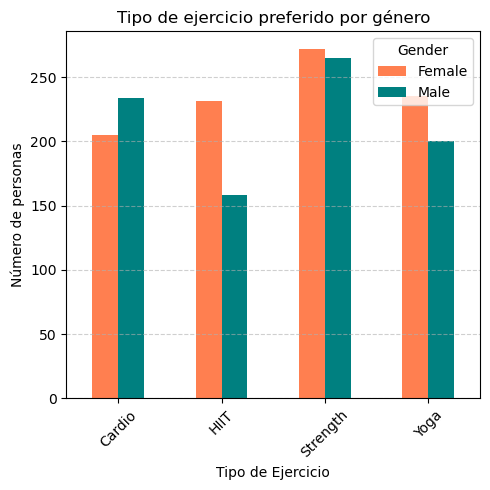

In [ ]:
# 1. Consulta a MongoDB
query = [{"$group": {"_id": {"Gender": "$Gender", "Workout_Type": "$Workout_Type"}, "cantidad": {"$sum": 1}}},
    {"$sort": {"_id.Workout_Type": 1, "_id.Gender": 1}}]

resultado = list(coleccion.aggregate(query))

# 2. DataFrame
df = pd.DataFrame([
    {"Gender": r["_id"]["Gender"], "Workout_Type": r["_id"]["Workout_Type"], "Cantidad": r["cantidad"]}
    for r in resultado
])

# 3. Pivot
pivot = df.pivot(index="Workout_Type", columns="Gender", values="Cantidad").fillna(0)
pivot = pivot.reindex(columns=["Female", "Male"])

# 4. Gráfico
pivot.plot(kind="bar", figsize=(5, 5), color=["coral", "teal"])  # cambia colores aquí si quieres
plt.title("Tipo de ejercicio preferido por género")
plt.xlabel("Tipo de Ejercicio")
plt.ylabel("Número de personas")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.legend(title="Gender")
plt.show()

Female - Cardio: 205
Male - Cardio: 234
Female - HIIT: 231
Male - HIIT: 158
Female - Strength: 272
Male - Strength: 265
Female - Yoga: 235
Male - Yoga: 200

***🩺 4. Enfoque en salud femenina***
Descricion aqui:

**¿Cuántas hacen ejercicio al menos 3 días/semana?**

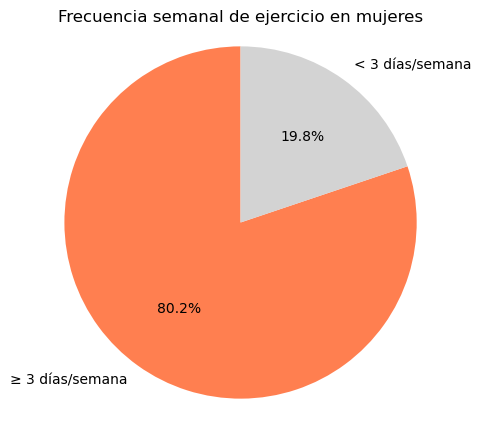

In [ ]:
# 1. Contar mujeres que hacen ≥ 3 días/semana, contamos el total de mujeres
mujeres_activas = coleccion.count_documents({"Gender": "Female","Workout_Frequency (days/week)": {"$gte": 3}})
total_mujeres = coleccion.count_documents({"Gender": "Female"})

# 3. Calcular mujeres inactivas
mujeres_inactivas = total_mujeres - mujeres_activas

# 4. Graficar en pastel
labels = ["≥ 3 días/semana", "< 3 días/semana"]
valores = [mujeres_activas, mujeres_inactivas]
colores = ["coral", "lightgray"]

plt.figure(figsize=(5, 5))
plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=90, colors=colores)
plt.title("Frecuencia semanal de ejercicio en mujeres")
plt.axis("equal")
plt.show()

Del total de 943 mujeres en el dataset, 756 (80.1%) realizan ejercicio al menos 3 días por semana, lo cual sugiere un hábito activo generalizado. Este dato es especialmente relevante en estudios de salud femenina, ya que la frecuencia de ejercicio se asocia con mejores indicadores metabólicos, hormonales y cardiovasculares.

***¿Qué tipo de ejercicios hacen las mujeres mayores de 45 años?***
Considerando que la menopausia empieza entre los 40 y 50.

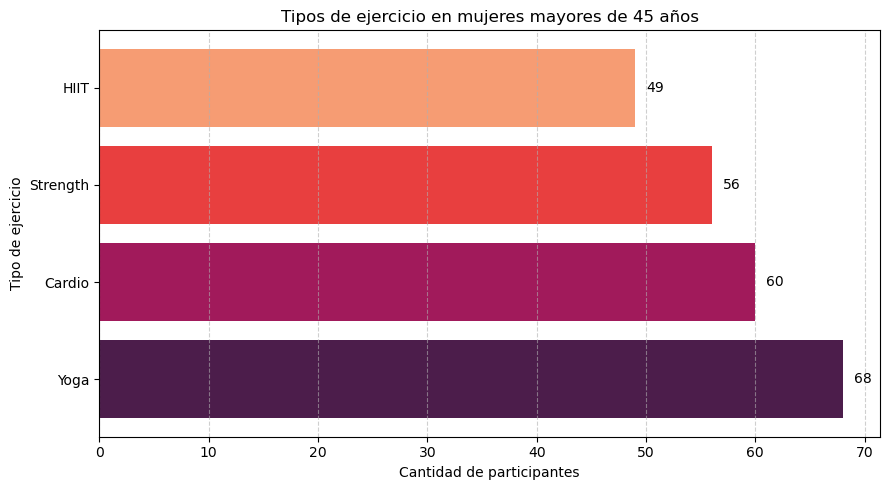

In [ ]:
mujeres_mayores = [{"$match": {"Gender": "Female", "Age": {"$gt": 45}}},
    {"$group": {"_id": "$Workout_Type", "Cantidad": {"$sum": 1}}},{"$sort": {"Cantidad": -1}}]
resultado = list(coleccion.aggregate(mujeres_mayores))

# 2. Convertir a DataFrame
df = pd.DataFrame(resultado)
df.columns = ['Workout_Type', 'Cantidad']

# 3. Paleta de colores "rocke"
colores = sns.color_palette("rocket", n_colors=len(df))

# 4. Gráfico de barras horizontal con etiquetas
plt.figure(figsize=(9, 5))
bars = plt.barh(df['Workout_Type'], df['Cantidad'], color=colores)

for bar in bars:
    ancho = bar.get_width()
    plt.text(ancho + 1, bar.get_y() + bar.get_height()/2,
             f'{int(ancho)}', va='center', fontsize=10)

plt.title("Tipos de ejercicio en mujeres mayores de 45 años")
plt.xlabel("Cantidad de participantes")
plt.ylabel("Tipo de ejercicio")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

De las 943 mujeres totales, solo 233 (24.7%) tienen más de 45 años. Dentro de este grupo, las actividades más frecuentes son Yoga (29.2%) y Cardio (25.8%). Esto podría reflejar una preferencia por rutinas menos intensas o de bajo impacto en edades cercanas o posteriores a la menopausia, considenrando que la menopausia esta entre los 40 y 50 años.

***A mayor experiencia → más calorías quemadas?***
Un análisis general incluyendo hombres y mujeres. Considerando que:
Nivel 1: Principiante – 2 Medio – 3 Avanzado

In [ ]:
pipeline = [{"$match": {"Experience_Level": {"$in": [1, 2, 3]},"Gender": {"$in": ["Male", "Female"]},
    "Calories_Burned": {"$ne": None}}},{"$group": {"_id": {"Gender": "$Gender",
    "Experience_Level": "$Experience_Level"},"Promedio_Calorias": {"$avg": "$Calories_Burned"}}},
    {"$sort": {"_id.Experience_Level": 1, "_id.Gender": 1}}]

resultado = list(coleccion.aggregate(pipeline))

In [ ]:
# Crear DataFrame
df = pd.DataFrame([{"Gender": r["_id"]["Gender"],"Experience_Level": int(r["_id"]["Experience_Level"]),
        "Promedio_Calorias": r["Promedio_Calorias"]}
    for r in resultado
])

# Pivotear para convertir en tabla: filas = niveles, columnas = géneros
pivot = df.pivot(index="Experience_Level", columns="Gender", values="Promedio_Calorias")
pivot = pivot.fillna(0).sort_index()

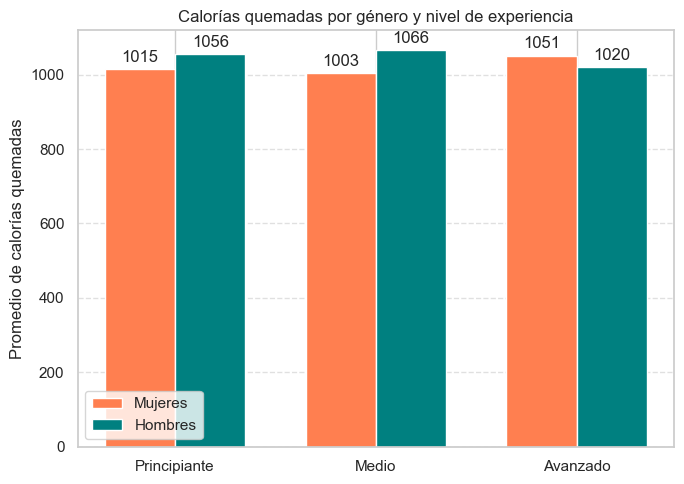

In [ ]:
# Datos
labels = ['Principiante', 'Medio', 'Avanzado']
male_vals = pivot['Male'].values
female_vals = pivot['Female'].values

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 5))

rects1 = ax.bar(x - width/2, female_vals, width, label='Mujeres', color='coral')
rects2 = ax.bar(x + width/2, male_vals, width, label='Hombres', color='teal')

# Etiquetas en barras
ax.bar_label(rects1, padding=3, fmt='%.0f')
ax.bar_label(rects2, padding=3, fmt='%.0f')

# Estética
ax.set_ylabel('Promedio de calorías quemadas')
ax.set_title('Calorías quemadas por género y nivel de experiencia')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()